In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.getcwd()

'/Users/apple'

In [2]:
affine=pd.read_csv('/Users/apple/Desktop/afinn.csv')
bing=pd.read_csv("/Users/apple/Desktop/bing.csv")
nrc=pd.read_csv("/Users/apple/Desktop/nrc.csv")
loughran=pd.read_csv("/Users/apple/Desktop/loughran.csv")
friends_quotes=pd.read_csv("/Users/apple/Desktop/friends_quotes (1).csv")
for df in [affine, bing, nrc, loughran]:
    if 'Unnamed: 0' in df.columns:
        df.drop(columns=['Unnamed: 0'], inplace=True)

In [3]:
affine=pd.merge(affine,bing,on="word",how="outer")
affine=pd.merge(affine,nrc,on="word",how="outer")
affine=pd.merge(affine,loughran,on="word",how="outer")

In [4]:
affine

,word,value,sentiment_x,sentiment_y,sentiment
0,abandon,-2.0,NaN,fear,negative
1,abandon,-2.0,NaN,negative,negative
2,abandon,-2.0,NaN,sadness,negative
3,abandoned,-2.0,NaN,anger,negative
4,abandoned,-2.0,NaN,fear,negative
...,...,...,...,...,...
21685,superannuation,NaN,NaN,NaN,superfluous
21686,theses,NaN,NaN,NaN,superfluous
21687,ubiquitous,NaN,NaN,NaN,superfluous
21688,wheresoever,NaN,NaN,NaN,superfluous


In [5]:
affine["sentiment"].value_counts()

sentiment
negative        3343
litigious       1027
positive         518
uncertainty      347
constraining     225
superfluous       60
Name: count, dtype: int64

In [6]:
import os

In [7]:
glove='/Users/apple/Desktop/glove.twitter.27B/glove.twitter.27B.200d.txt'

In [8]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def load_glove_embeddings(glove_path):
    embeddings = {}
    with open(glove_path, 'r', encoding='utf8') as f:
        for line in f:
            parts = line.strip().split()
            word = parts[0]
            vector = np.array(parts[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

glove_path = '/Users/apple/Desktop/glove.6B (1)/glove.6B.200d.txt'

print("Loading GloVe embeddings...")
glove_embeddings = load_glove_embeddings(glove_path)
print(f"Loaded {len(glove_embeddings)} words from GloVe.")

known_words = affine.loc[affine['value'].notna(), 'word'].tolist()
known_values = dict(zip(affine.loc[affine['value'].notna(), 'word'], affine.loc[affine['value'].notna(), 'value']))


known_vectors = []
known_word_list = []

for word in known_words:
    if word in glove_embeddings:
        known_vectors.append(glove_embeddings[word])
        known_word_list.append(word)

known_vectors = np.stack(known_vectors)  

print(f"{len(known_vectors)} known words have embeddings.")

missing_idx = affine['value'].isna()

for idx, row in affine[missing_idx].iterrows():
    word = row['word']
    if word in glove_embeddings:
        word_vec = glove_embeddings[word].reshape(1, -1)
        sims = cosine_similarity(word_vec, known_vectors)  
        best_idx = np.argmax(sims)  
        closest_word = known_word_list[best_idx]
        predicted_value = known_values[closest_word]
        

        affine.at[idx, 'value'] = predicted_value
    else:

        continue

affine['value'] = affine['value'].round()
affine['value'] = affine['value'].clip(-5.0, 5.0)

print("Finished filling missing values!")


Loading GloVe embeddings...
Loaded 400001 words from GloVe.
4202 known words have embeddings.
Finished filling missing values!


In [9]:
affine["value"].isna().sum()

913

In [10]:
affine[affine["value"]==5.0]

,word,value,sentiment_x,sentiment_y,sentiment
512,breathtaking,5.0,positive,NaN,NaN
2102,hurrah,5.0,NaN,joy,NaN
2103,hurrah,5.0,NaN,positive,NaN
2855,outstanding,5.0,positive,joy,NaN
2856,outstanding,5.0,positive,negative,NaN
2857,outstanding,5.0,positive,positive,NaN
3772,superb,5.0,positive,positive,NaN
3866,thrilled,5.0,positive,NaN,NaN
5695,dazzling,5.0,positive,NaN,NaN
6760,exceptional,5.0,positive,NaN,positive


In [11]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def load_glove_embeddings(glove_path):
    embeddings = {}
    with open(glove_path, 'r', encoding='utf8') as f:
        for line in f:
            parts = line.strip().split()
            word = parts[0]
            vector = np.array(parts[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings


glove_path = '/Users/apple/Desktop/glove.twitter.27B/glove.twitter.27B.200d.txt'  

print("Loading GloVe embeddings...")
glove_embeddings = load_glove_embeddings(glove_path)
print(f"Loaded {len(glove_embeddings)} words from GloVe.")

known_words = affine.loc[affine['sentiment_x'].notna(), 'word'].tolist()
known_sentiments = dict(zip(affine.loc[affine['sentiment_x'].notna(), 'word'], affine.loc[affine['sentiment_x'].notna(), 'sentiment_x']))


known_vectors = []
known_word_list = []

for word in known_words:
    if word in glove_embeddings:
        known_vectors.append(glove_embeddings[word])
        known_word_list.append(word)

known_vectors = np.stack(known_vectors)  

print(f"{len(known_vectors)} known words have embeddings for sentiment_x.")

missing_idx = affine['sentiment_x'].isna()

for idx, row in affine[missing_idx].iterrows():
    word = row['word']
    if word in glove_embeddings:
        word_vec = glove_embeddings[word].reshape(1, -1)
        sims = cosine_similarity(word_vec, known_vectors)
        best_idx = np.argmax(sims) 
        closest_word = known_word_list[best_idx]
        predicted_sentiment = known_sentiments[closest_word]
        

        affine.at[idx, 'sentiment_x'] = predicted_sentiment
    else:
        continue

print("Finished filling missing sentiment_x values!")



Loading GloVe embeddings...
Loaded 1193515 words from GloVe.
9344 known words have embeddings for sentiment_x.
Finished filling missing sentiment_x values!


In [12]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def load_glove_embeddings(glove_path):
    embeddings = {}
    with open(glove_path, 'r', encoding='utf8') as f:
        for line in f:
            parts = line.strip().split()
            word = parts[0]
            vector = np.array(parts[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings


glove_path = '/Users/apple/Desktop/glove.twitter.27B/glove.twitter.27B.200d.txt' 

print("Loading GloVe embeddings...")
glove_embeddings = load_glove_embeddings(glove_path)
print(f"Loaded {len(glove_embeddings)} words from GloVe.")

known_words = affine.loc[affine['sentiment_y'].notna(), 'word'].tolist()
known_sentiments = dict(zip(affine.loc[affine['sentiment_y'].notna(), 'word'], affine.loc[affine['sentiment_y'].notna(), 'sentiment_y']))


known_vectors = []
known_word_list = []

for word in known_words:
    if word in glove_embeddings:
        known_vectors.append(glove_embeddings[word])
        known_word_list.append(word)

known_vectors = np.stack(known_vectors) 

print(f"{len(known_vectors)} known words have embeddings for sentiment_x.")


missing_idx = affine['sentiment_y'].isna()

for idx, row in affine[missing_idx].iterrows():
    word = row['word']
    if word in glove_embeddings:
        word_vec = glove_embeddings[word].reshape(1, -1)
        sims = cosine_similarity(word_vec, known_vectors)  
        best_idx = np.argmax(sims)  
        closest_word = known_word_list[best_idx]
        predicted_sentiment = known_sentiments[closest_word]
        
        # Fill in
        affine.at[idx, 'sentiment_y'] = predicted_sentiment
    else:
        
        continue

print("Finished filling missing sentiment_y values!")

Loading GloVe embeddings...
Loaded 1193515 words from GloVe.
13819 known words have embeddings for sentiment_x.
Finished filling missing sentiment_y values!


In [13]:
sentiment_y=dict()
for i in affine["word"].values:
    sentiment_y[i]=affine[affine["word"]==i]["sentiment_y"].values

In [14]:
for key in sentiment_y:
    sentiment_y[key] = sorted(sentiment_y[key])

In [15]:
affine["sentiment_y"] = affine["word"].map(sentiment_y)

In [16]:
affine.drop_duplicates(subset="word",inplace=True)

In [17]:
affine

,word,value,sentiment_x,sentiment_y,sentiment
0,abandon,-2.0,negative,"[fear, negative, sadness]",negative
3,abandoned,-2.0,negative,"[anger, fear, negative, sadness]",negative
7,abandons,-2.0,negative,[sadness],negative
8,abducted,-2.0,negative,[surprise],NaN
9,abduction,-2.0,negative,"[fear, negative, sadness, surprise]",NaN
...,...,...,...,...,...
21685,superannuation,-3.0,negative,[sadness],superfluous
21686,theses,1.0,negative,[negative],superfluous
21687,ubiquitous,3.0,negative,[sadness],superfluous
21688,wheresoever,NaN,negative,[negative],superfluous


/var/folders/r5/s738c4md0pnb3c2fw4h979wr0000gn/T/ipykernel_29111/2991797266.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='value', data=affine, palette='Set2')


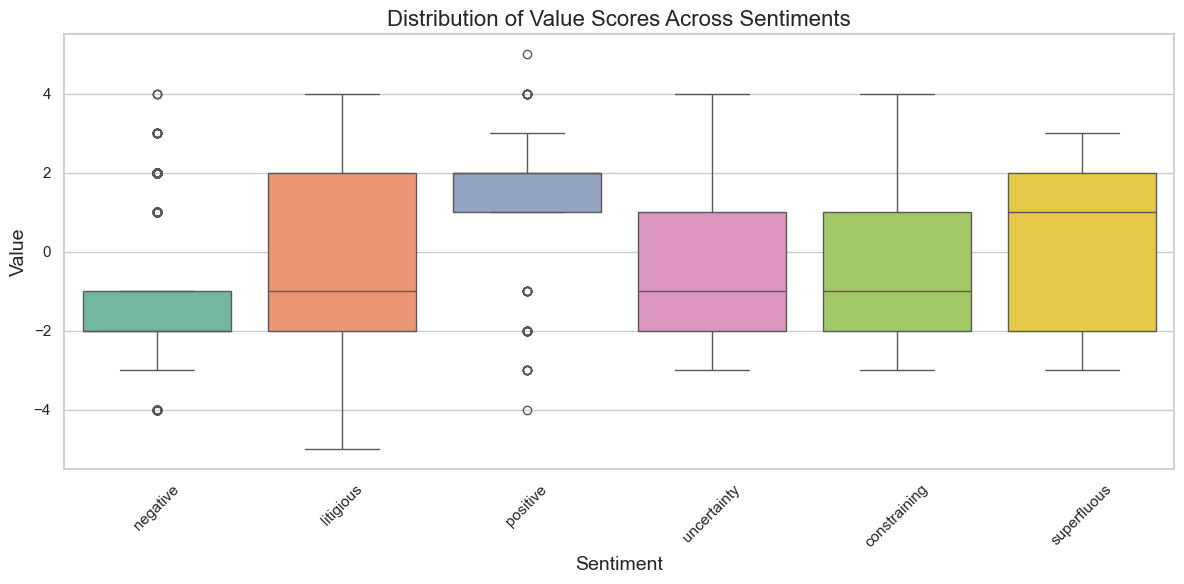

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


plt.figure(figsize=(12, 6))
sns.boxplot(x='sentiment', y='value', data=affine, palette='Set2')


plt.title('Distribution of Value Scores Across Sentiments', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.xticks(rotation=45)  
plt.tight_layout()
plt.savefig("Sentiment1")
# Show plot
plt.show()


/var/folders/r5/s738c4md0pnb3c2fw4h979wr0000gn/T/ipykernel_29111/2335124146.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment_x', y='value', data=affine, palette='Set3')


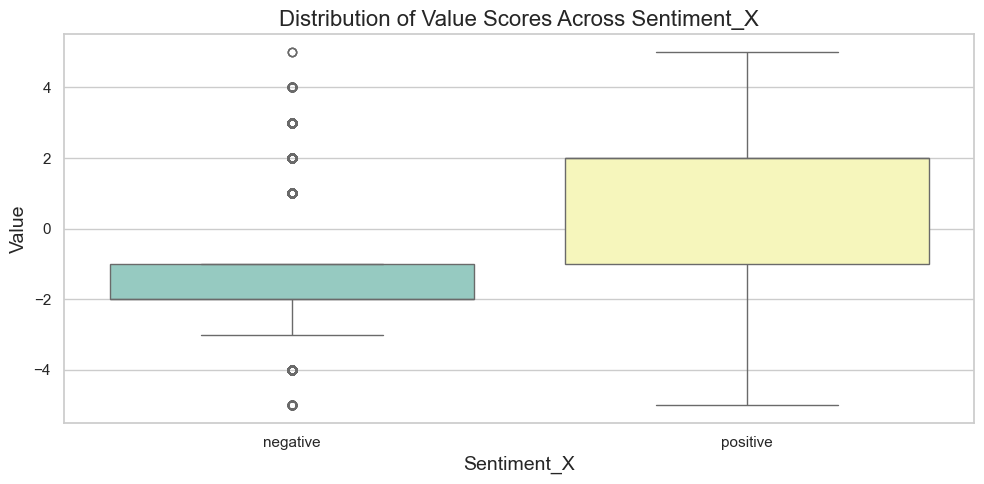

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


plt.figure(figsize=(10, 5))
sns.boxplot(x='sentiment_x', y='value', data=affine, palette='Set3')

plt.title('Distribution of Value Scores Across Sentiment_X', fontsize=16)
plt.xlabel('Sentiment_X', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("sentiment2")

plt.show()


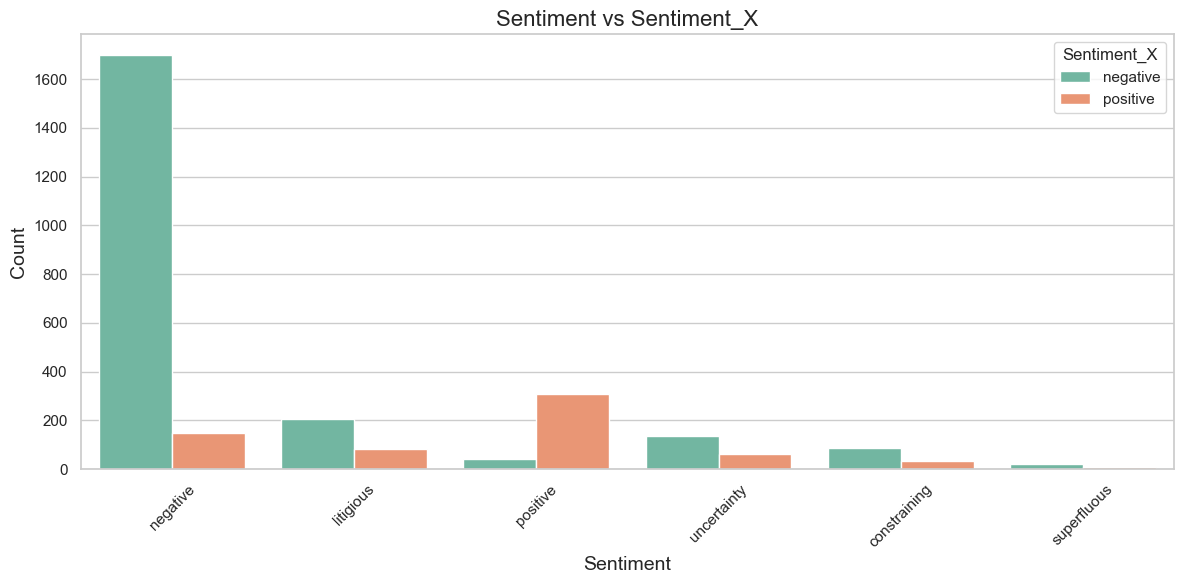

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


plt.figure(figsize=(12, 6))
sns.countplot(data=affine, x='sentiment', hue='sentiment_x', palette='Set2')

plt.title('Sentiment vs Sentiment_X', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Sentiment_X')
plt.tight_layout()
plt.savefig("sentiment3")
plt.show()


In [21]:

affine_exploded = affine.explode('sentiment_y')


affine_exploded = affine_exploded.reset_index(drop=True)

affine_exploded = affine_exploded.dropna(subset=['sentiment_y'])


/var/folders/r5/s738c4md0pnb3c2fw4h979wr0000gn/T/ipykernel_29111/3871221867.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment_y', y='value', data=affine_exploded, palette='Set2')


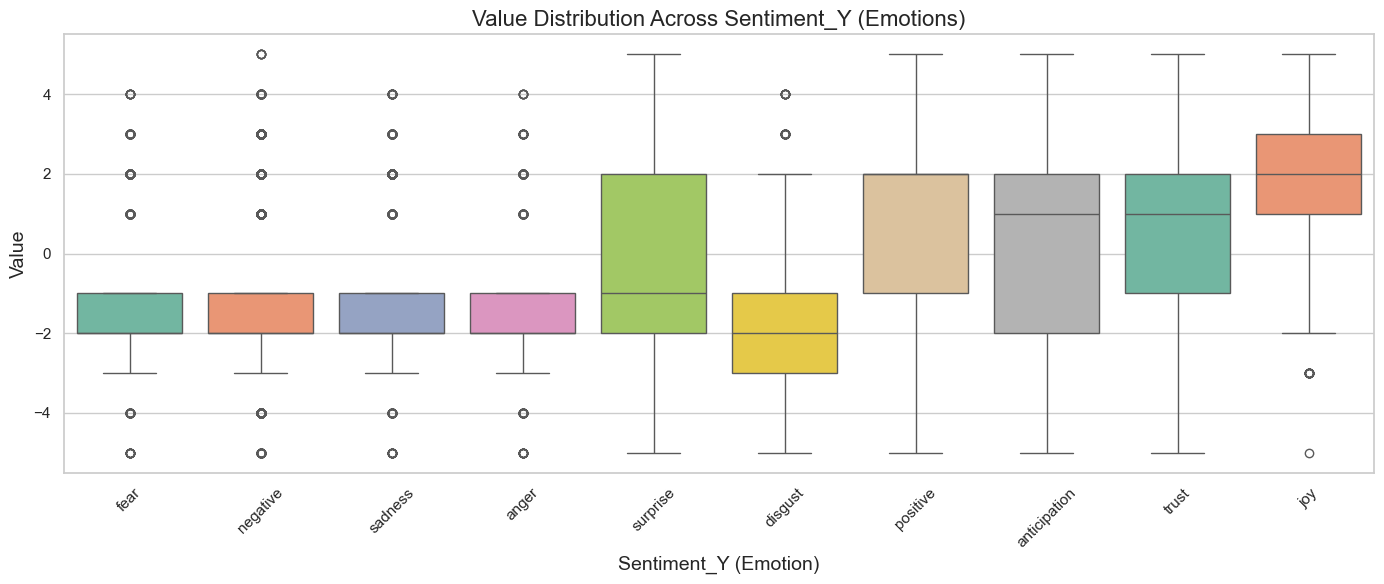

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(14, 6))
sns.boxplot(x='sentiment_y', y='value', data=affine_exploded, palette='Set2')

plt.title('Value Distribution Across Sentiment_Y (Emotions)', fontsize=16)
plt.xlabel('Sentiment_Y (Emotion)', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("sentiment4")
plt.show()

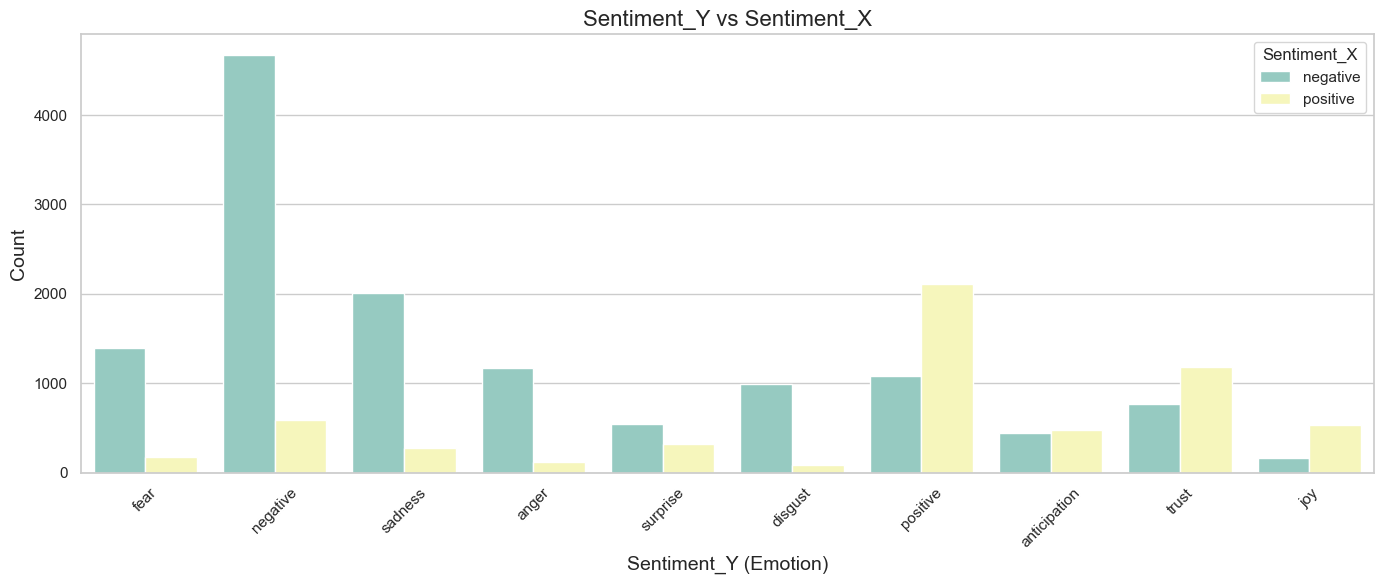

In [23]:
plt.figure(figsize=(14, 6))
sns.countplot(data=affine_exploded, x='sentiment_y', hue='sentiment_x', palette='Set3')

plt.title('Sentiment_Y vs Sentiment_X', fontsize=16)
plt.xlabel('Sentiment_Y (Emotion)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Sentiment_X')
plt.tight_layout()
plt.savefig("sentiment5")
plt.show()


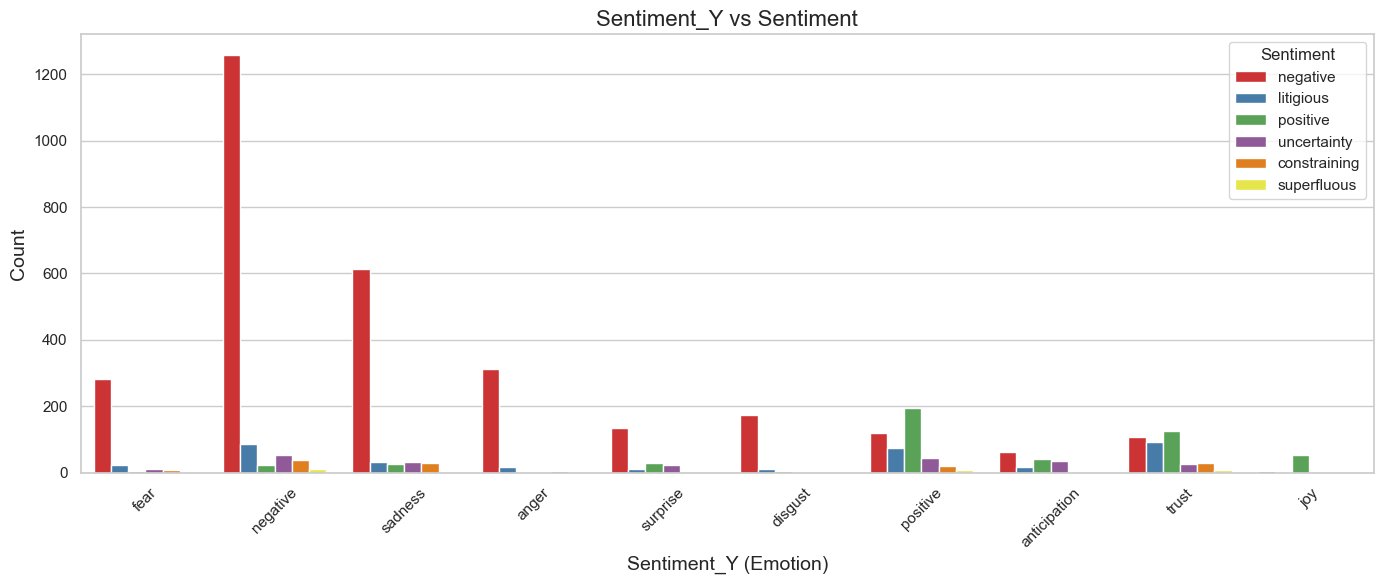

In [24]:
plt.figure(figsize=(14, 6))
sns.countplot(data=affine_exploded, x='sentiment_y', hue='sentiment', palette='Set1')

plt.title('Sentiment_Y vs Sentiment', fontsize=16)
plt.xlabel('Sentiment_Y (Emotion)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()

plt.show()


In [25]:
affine

,word,value,sentiment_x,sentiment_y,sentiment
0,abandon,-2.0,negative,"[fear, negative, sadness]",negative
3,abandoned,-2.0,negative,"[anger, fear, negative, sadness]",negative
7,abandons,-2.0,negative,[sadness],negative
8,abducted,-2.0,negative,[surprise],NaN
9,abduction,-2.0,negative,"[fear, negative, sadness, surprise]",NaN
...,...,...,...,...,...
21685,superannuation,-3.0,negative,[sadness],superfluous
21686,theses,1.0,negative,[negative],superfluous
21687,ubiquitous,3.0,negative,[sadness],superfluous
21688,wheresoever,NaN,negative,[negative],superfluous


In [117]:
# Assume your main dataframe is called 'affine'

# 1. Save 'word' and 'value' to affine.csv
affine[['word', 'value']].to_csv('affine.csv', index=False)

# 2. Save 'word' and 'sentiment_x' to bing.csv
affine[['word', 'sentiment']].to_csv('bing.csv', index=False)

# 3. Save 'word' and 'sentiment_y' to nrc.csv
affine[['word', 'sentiment_y']].to_csv('nrc.csv', index=False)

# 4. Save 'word' and 'sentiment' to loughran.csv
affine[['word', 'sentiment']].to_csv('loughran.csv', index=False)

print("All 4 CSV files created successfully!")


✅ All 4 CSV files created successfully!
